In [1]:
import pandas as pd 
df=pd.read_csv('Pokemon.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

<AxesSubplot: >

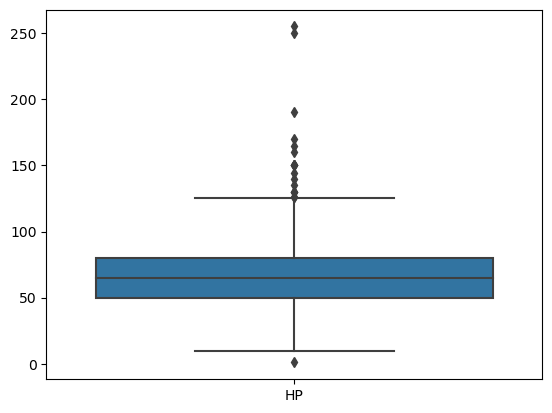

In [6]:
import seaborn as sns
sns.boxplot(df[['HP']])

In [7]:
df['Type 1'].unique()


array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [8]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']])

In [9]:
df['Type 1']=oe.fit_transform(df[['Type 1']])

In [10]:
df['Type 1'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

In [11]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [12]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,0.0,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,0.0,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,0.0,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,0.0,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,1.0,NaN,309,39,52,43,60,50,65,1,False


In [13]:
df['Type 2'].mode()

0    Flying
Name: Type 2, dtype: object

In [14]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [15]:
df['Type 2'].mode()[0]

'Flying'

In [16]:
import numpy as np
df['Type 2']=df['Type 2'].replace(np.nan,'NO')

In [17]:
df.isnull().sum().sum()

0

In [18]:
df['Type 2'].unique()

array(['Poison', 'NO', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [19]:
oe=OrdinalEncoder(categories=[['Poison', 'NO','Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal']])
df['Type 2']=oe.fit_transform(df[['Type 2']])

In [20]:
df.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,0.0,0.0,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,0.0,0.0,405,60,62,63,80,80,60,1,False


In [21]:
df['Type 2'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [22]:
df['Type 1'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

In [23]:
df1=df.drop(['#','Name'],axis=1)

In [24]:
df1.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,0.0,318,45,49,49,65,65,45,1,False
1,0.0,0.0,405,60,62,63,80,80,60,1,False
2,0.0,0.0,525,80,82,83,100,100,80,1,False
3,0.0,0.0,625,80,100,123,122,120,80,1,False
4,1.0,1.0,309,39,52,43,60,50,65,1,False


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['Legendary']=le.fit_transform(df1['Legendary'])

In [26]:
df1.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.0,0.0,318,45,49,49,65,65,45,1,0
1,0.0,0.0,405,60,62,63,80,80,60,1,0
2,0.0,0.0,525,80,82,83,100,100,80,1,0
3,0.0,0.0,625,80,100,123,122,120,80,1,0
4,1.0,1.0,309,39,52,43,60,50,65,1,0


In [28]:
x=df1.iloc[:,:-1]
y=df1.Legendary

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.20)

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [38]:
q=pd.DataFrame(data=X_train_ss[:,3],columns=['HP'])
q

,HP
0,0.028039
1,1.612589
2,-1.358442
3,-1.160373
4,1.018383
...,...
635,0.028039
636,0.226108
637,1.216452
638,-0.566167


<AxesSubplot: >

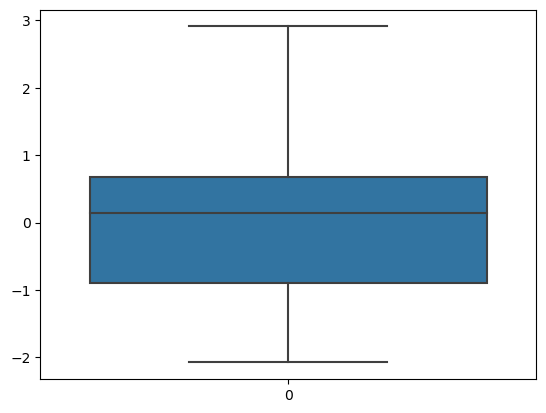

In [41]:
sns.boxplot(X_train_ss[:,2])

In [ ]:
import pickle as pkl
pkl.dump(ss,open('scalerpokemon','wb'))

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_ss_pca=pca.fit_transform(X_train_ss)
X_test_ss_pca=pca.transform(X_test_ss)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train_ss_pca[:,0],X_train_ss_pca[:,1],c=y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [ ]:
model={'logistic':LogisticRegression(),
      'DTC':DecisionTreeClassifier(),
      'svm':SVC(),
      'randforest':RandomForestClassifier(),
       'Gnb':GaussianNB(),
       'GBC':GradientBoostingClassifier(),
       'neigh':KNeighborsClassifier()
      
      }

In [ ]:
for i in range(len(model)):
    p=list(model.values())[i].fit(X_train_ss_pca,y_train)
    y_pred=p.predict(X_test_ss_pca)
    print(list(model.keys())[i])
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(precision_score(y_test,y_pred))
    print(recall_score(y_test,y_pred))
    print('----')

In [ ]:
from sklearn.model_selection import GridSearchCV
lr=KNeighborsClassifier()
para={'weights':['uniform', 'distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gscv=GridSearchCV(lr,param_grid=para)

In [ ]:
gscv.fit(X_train_ss_pca,y_train)
y_pred1=gscv.predict(X_test_ss_pca)

In [ ]:
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))

In [ ]:
gscv.best_params_